WHO Region
Europe                   56
Africa                   48
Americas                 35
Eastern Mediterranean    22
Western Pacific          16
South-East Asia          10
Name: count, dtype: int64
WHO Region
Europe                   29.946524
Africa                   25.668449
Americas                 18.716578
Eastern Mediterranean    11.764706
Western Pacific           8.556150
South-East Asia           5.347594
Name: proportion, dtype: float64


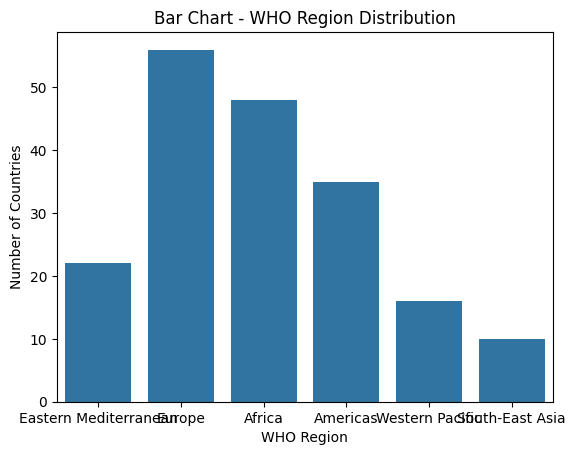

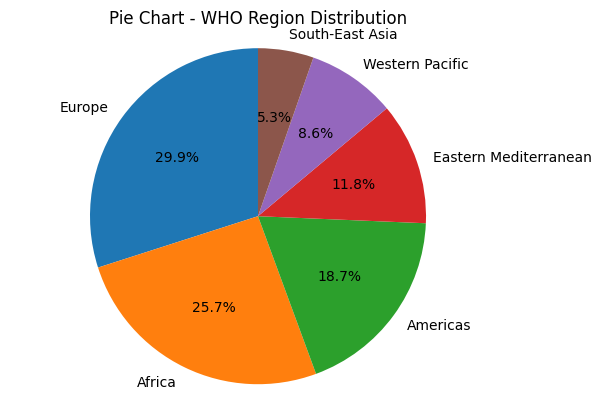

Confirmed Cases Summary:
count    1.870000e+02
mean     8.813094e+04
std      3.833187e+05
min      1.000000e+01
25%      1.114000e+03
50%      5.059000e+03
75%      4.046050e+04
max      4.290259e+06
Name: Confirmed, dtype: float64


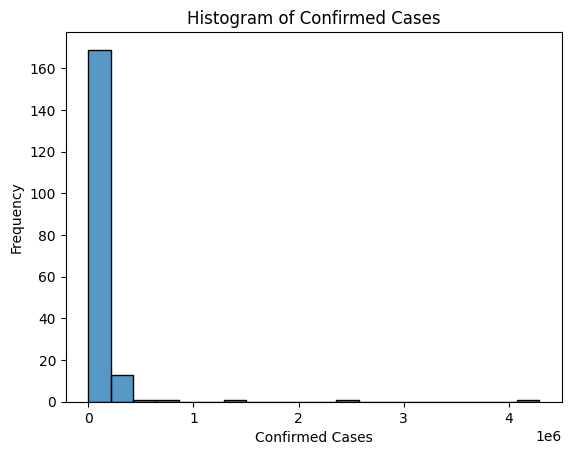

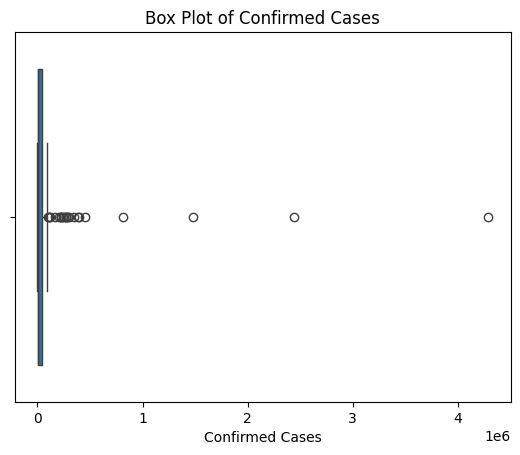

/tmp/ipython-input-3411711561.py:43: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['Confirmed'], shade=True)


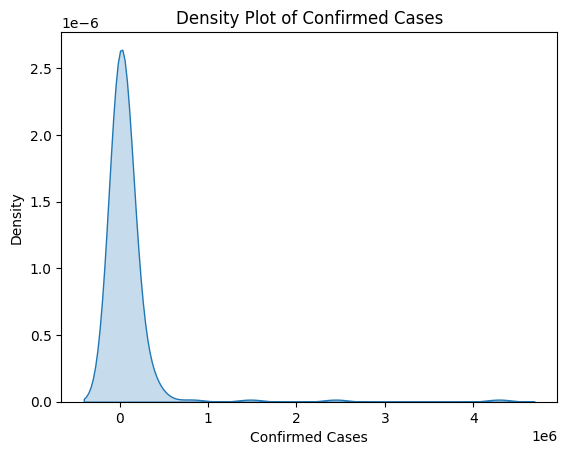

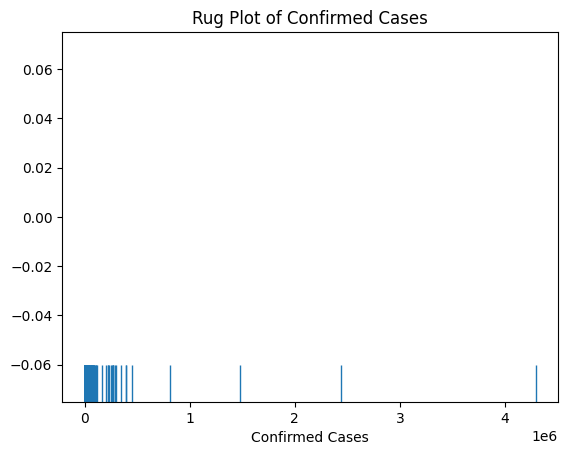

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("country_wise_latest.csv")

# Frequency of WHO Regions
print(df['WHO Region'].value_counts())
print(df['WHO Region'].value_counts(normalize=True) * 100)

# Bar Chart
sns.countplot(x='WHO Region', data=df)
plt.title("Bar Chart - WHO Region Distribution")
plt.xlabel("WHO Region")
plt.ylabel("Number of Countries")
plt.show()

# Pie Chart
region_counts = df['WHO Region'].value_counts()
plt.pie(region_counts, labels=region_counts.index, autopct='%1.1f%%', startangle=90)
plt.title("Pie Chart - WHO Region Distribution")
plt.axis('equal')
plt.show()
# Summary Statistics
print("Confirmed Cases Summary:")
print(df['Confirmed'].describe())

# Histogram
sns.histplot(df['Confirmed'], bins=20, kde=False)
plt.title("Histogram of Confirmed Cases")
plt.xlabel("Confirmed Cases")
plt.ylabel("Frequency")
plt.show()

# Box Plot
sns.boxplot(x=df['Confirmed'])
plt.title("Box Plot of Confirmed Cases")
plt.xlabel("Confirmed Cases")
plt.show()

# Density Plot
sns.kdeplot(df['Confirmed'], shade=True)
plt.title("Density Plot of Confirmed Cases")
plt.xlabel("Confirmed Cases")
plt.show()

# Rug Plot
sns.rugplot(df['Confirmed'], height=0.1)
plt.title("Rug Plot of Confirmed Cases")
plt.xlabel("Confirmed Cases")
plt.show()

In [ ]:
from google.colab import files

# Upload the COVID-19 dataset
uploaded = files.upload()


Saving country_wise_latest.csv to country_wise_latest.csv


In [ ]:
!pip install joypy


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.graphics.mosaicplot import mosaic
from joypy import joyplot

# Load dataset
df = pd.read_csv("country_wise_latest.csv")
df.head()


,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region
0,Afghanistan,36263,1269,25198,9796,106,10,18,3.50,69.49,5.04,35526,737,2.07,Eastern Mediterranean
1,Albania,4880,144,2745,1991,117,6,63,2.95,56.25,5.25,4171,709,17.00,Europe
2,Algeria,27973,1163,18837,7973,616,8,749,4.16,67.34,6.17,23691,4282,18.07,Africa
3,Andorra,907,52,803,52,10,0,0,5.73,88.53,6.48,884,23,2.60,Europe
4,Angola,950,41,242,667,18,1,0,4.32,25.47,16.94,749,201,26.84,Africa


In [ ]:
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
continuous_cols = df.select_dtypes(include=['int64','float64']).columns.tolist()

print("Categorical Columns:", categorical_cols)
print("Continuous Columns:", continuous_cols)


Categorical Columns: ['Country/Region', 'WHO Region']
Continuous Columns: ['Confirmed', 'Deaths', 'Recovered', 'Active', 'New cases', 'New deaths', 'New recovered', 'Deaths / 100 Cases', 'Recovered / 100 Cases', 'Deaths / 100 Recovered', 'Confirmed last week', '1 week change', '1 week % increase']


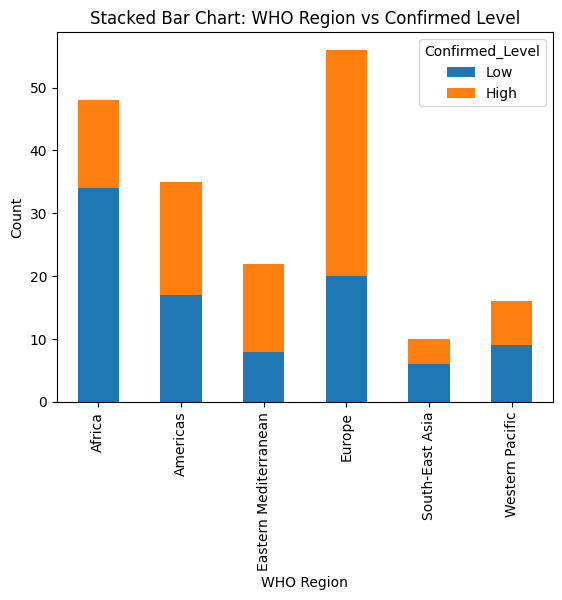

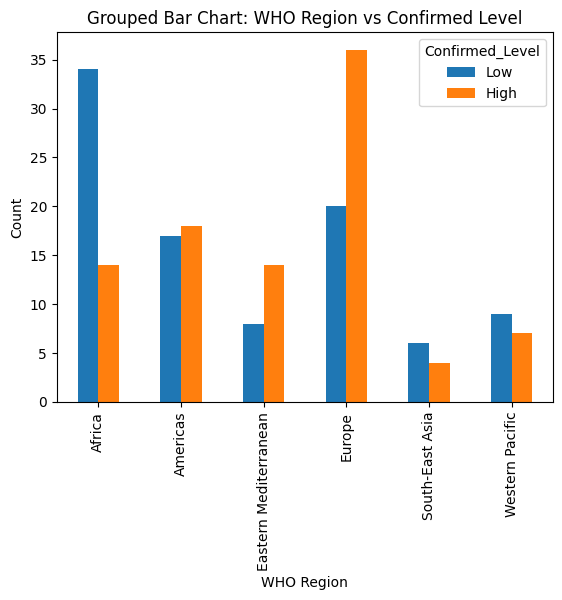

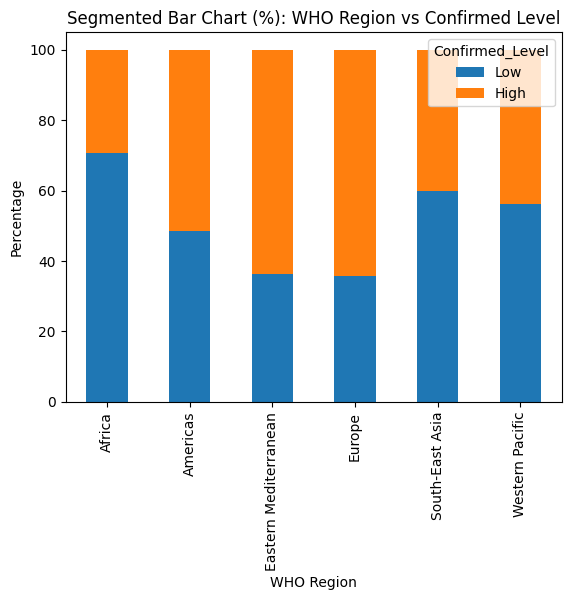

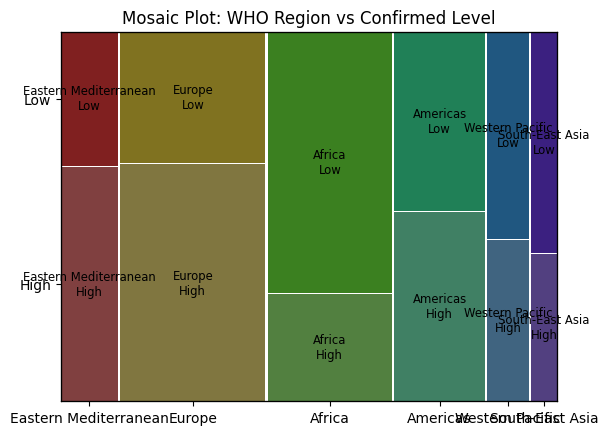

In [ ]:
# Create categorical High/Low confirmed levels
df['Confirmed_Level'] = pd.qcut(df['Confirmed'], q=2, labels=['Low','High'])

# Stacked Bar
pd.crosstab(df['WHO Region'], df['Confirmed_Level']).plot(kind='bar', stacked=True)
plt.title("Stacked Bar Chart: WHO Region vs Confirmed Level")
plt.ylabel("Count")
plt.show()

# Grouped Bar
pd.crosstab(df['WHO Region'], df['Confirmed_Level']).plot(kind='bar', stacked=False)
plt.title("Grouped Bar Chart: WHO Region vs Confirmed Level")
plt.ylabel("Count")
plt.show()

# Segmented Bar
(pd.crosstab(df['WHO Region'], df['Confirmed_Level'], normalize='index')*100).plot(kind='bar', stacked=True)
plt.title("Segmented Bar Chart (%): WHO Region vs Confirmed Level")
plt.ylabel("Percentage")
plt.show()

# Mosaic Plot
mosaic(df, ['WHO Region','Confirmed_Level'])
plt.title("Mosaic Plot: WHO Region vs Confirmed Level")
plt.show()


In [ ]:
# Step – 1 Load the Dataset
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import parallel_coordinates

# Load dataset
df = pd.read_csv("country_wise_latest.csv")
print(df.head())
print(df.info())

# Step – 2 Identify Numeric & Categorical Columns
num_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
cat_cols = df.select_dtypes(include=['object']).columns.tolist()

print("Numeric Columns:", num_cols)
print("Categorical Columns:", cat_cols)

# Step – 3 Scatterplot Matrix (pairwise relationships)
sns.pairplot(df[num_cols[:5]], diag_kind='kde')
plt.suptitle("Scatterplot Matrix - COVID Data", y=1.02)
plt.show()

# Step – 4 Parallel Coordinates
if len(cat_cols) > 0:
    target_col = cat_cols[0]  # Example: "Country/Region"
    subset_cols = num_cols[:5] + [target_col]

    parallel_coordinates(df[subset_cols], class_column=target_col, colormap='viridis')
    plt.title("Parallel Coordinates Plot - COVID Data")
    plt.show()
else:
    print("No categorical columns available for Parallel Coordinates")

# Step – 5 Line Graph
df[num_cols[:4]].plot(kind='line', figsize=(10,5))
plt.title("Line Graph of Multiple COVID Measures")
plt.xlabel("Record Index")
plt.ylabel("Value")
plt.show()

# Step – 6 Stacked Bar Chart
if len(cat_cols) >= 2:
    stacked_data = pd.crosstab(df[cat_cols[0]], df[cat_cols[1]])
    stacked_data.plot(kind='bar', stacked=True, figsize=(10,6))
    plt.title(f"Stacked Bar Chart: {cat_cols[0]} vs {cat_cols[1]}")
    plt.ylabel("Count")
    plt.show()
else:
    print("Not enough categorical columns for stacked bar chart.")


FileNotFoundError: [Errno 2] No such file or directory: 'country_wise_latest.csv'

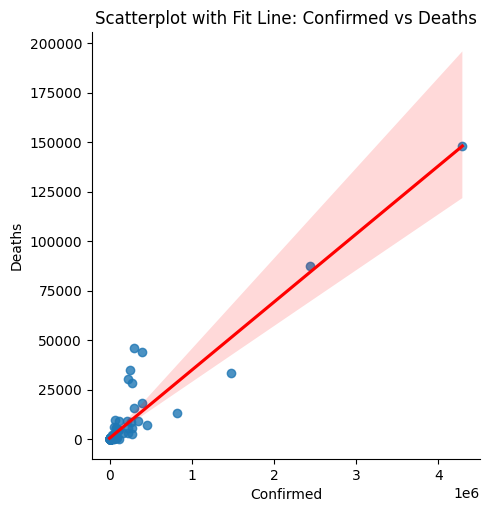

In [ ]:
sns.lmplot(data=df, x='Confirmed', y='Deaths', line_kws={'color':'red'})
plt.title("Scatterplot with Fit Line: Confirmed vs Deaths")
plt.show()


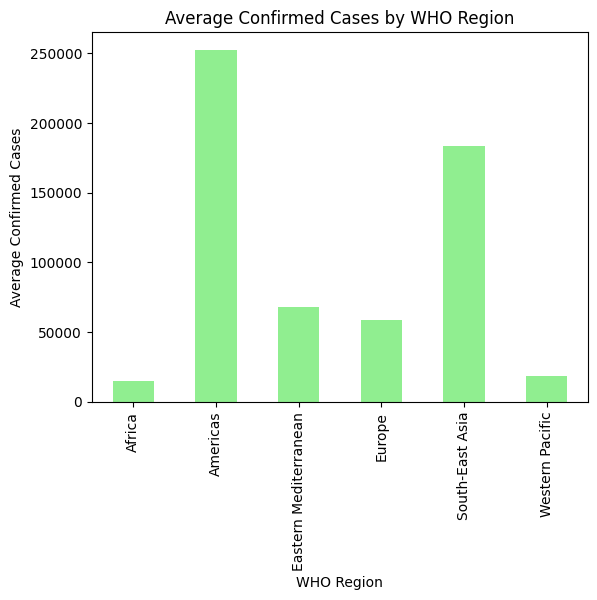

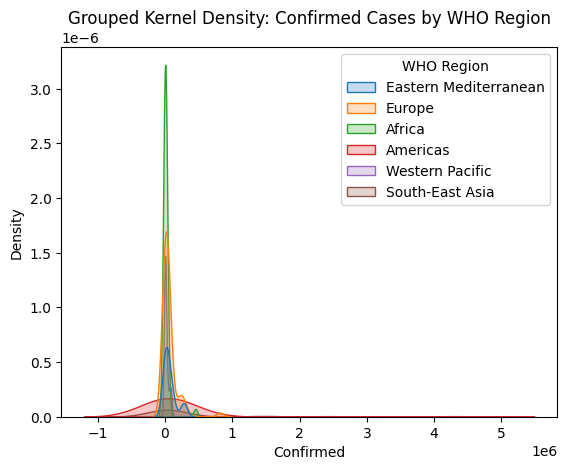

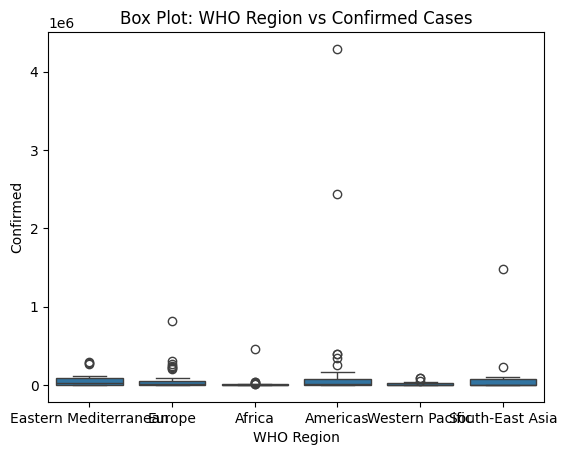

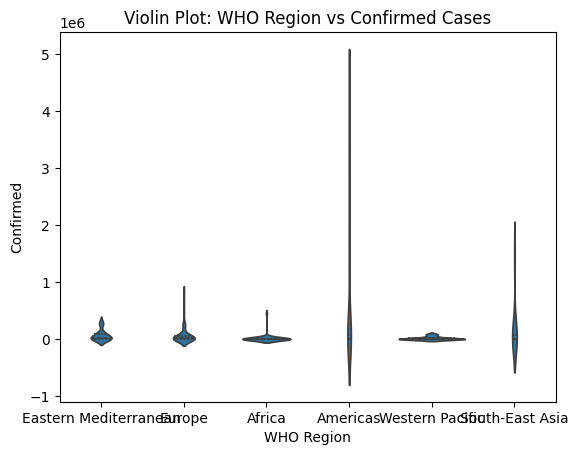

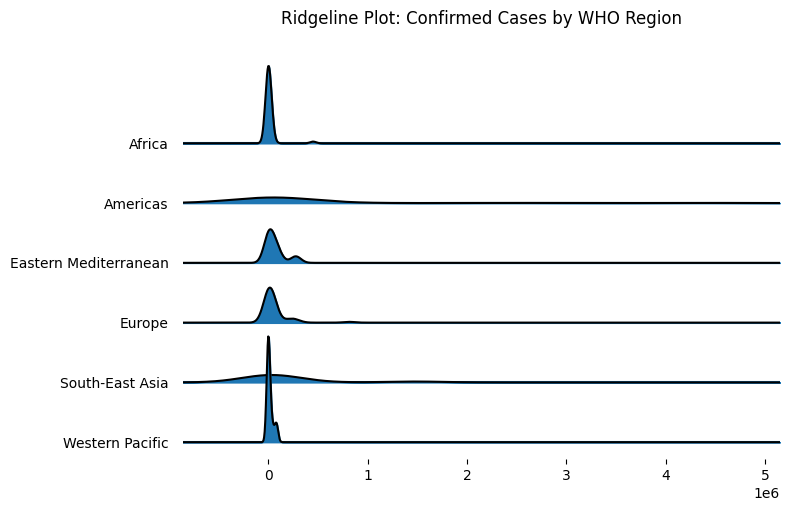

/usr/local/lib/python3.12/dist-packages/seaborn/categorical.py:3399: UserWarning: 31.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.12/dist-packages/seaborn/categorical.py:3399: UserWarning: 67.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.12/dist-packages/seaborn/categorical.py:3399: UserWarning: 79.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.12/dist-packages/seaborn/categorical.py:3399: UserWarning: 48.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.12/dist-packages/seaborn/categorical.py:3399: UserWarning: 31.2% of the points cannot be plac

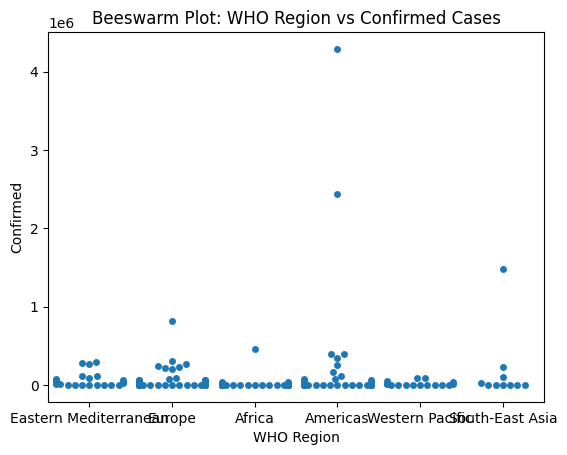

In [ ]:
# Bar Chart (Mean Confirmed per Region)
df.groupby('WHO Region')['Confirmed'].mean().plot(kind='bar', color='lightgreen')
plt.title("Average Confirmed Cases by WHO Region")
plt.ylabel("Average Confirmed Cases")
plt.show()

# KDE Plot
sns.kdeplot(data=df, x='Confirmed', hue='WHO Region', fill=True)
plt.title("Grouped Kernel Density: Confirmed Cases by WHO Region")
plt.show()

# Box Plot
sns.boxplot(data=df, x='WHO Region', y='Confirmed')
plt.title("Box Plot: WHO Region vs Confirmed Cases")
plt.show()

# Violin Plot
sns.violinplot(data=df, x='WHO Region', y='Confirmed', inner='quartile')
plt.title("Violin Plot: WHO Region vs Confirmed Cases")
plt.show()

# Ridgeline Plot
joyplot(df, by='WHO Region', column='Confirmed', figsize=(8,5))
plt.title("Ridgeline Plot: Confirmed Cases by WHO Region")
plt.show()

# Beeswarm Plot
sns.swarmplot(data=df, x='WHO Region', y='Confirmed')
plt.title("Beeswarm Plot: WHO Region vs Confirmed Cases")
plt.show()
